In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_excel("oasis_longitudinal_demographics.xlsx")
dataset.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2,27,0.0,1986.550000,0.696106,0.883440
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2,30,0.0,2004.479526,0.681062,0.875539
2,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2,22,0.5,1697.911134,0.701236,1.033623
3,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2,23,0.5,1678.290000,0.736336,1.045710
4,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2,28,0.5,1737.620000,0.713402,1.010000
5,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3,27,0.0,1200.100000,0.718214,1.462380
6,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3,28,0.0,1215.330000,0.709512,1.444060
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4,28,0.0,1688.580000,0.711502,1.039330
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4,29,0.5,1700.723122,0.711054,1.031914
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4,30,0.0,1699.269072,0.705081,1.032797


In [3]:
dataset["M/F"] = dataset["M/F"].replace(['M','F'],[0,1])
dataset.drop(columns = 'Hand', inplace = True)
dataset.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,0,87,14,2,27,0.0,1986.550000,0.696106,0.883440
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,0,88,14,2,30,0.0,2004.479526,0.681062,0.875539
2,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,0,80,12,2,22,0.5,1697.911134,0.701236,1.033623
3,OAS2_0002,OAS2_0002_MR1,Demented,1,0,0,75,12,2,23,0.5,1678.290000,0.736336,1.045710
4,OAS2_0002,OAS2_0002_MR2,Demented,2,560,0,76,12,2,28,0.5,1737.620000,0.713402,1.010000
5,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,1,90,18,3,27,0.0,1200.100000,0.718214,1.462380
6,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,1,88,18,3,28,0.0,1215.330000,0.709512,1.444060
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,0,80,12,4,28,0.0,1688.580000,0.711502,1.039330
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,0,83,12,4,29,0.5,1700.723122,0.711054,1.031914
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,0,85,12,4,30,0.0,1699.269072,0.705081,1.032797


In [4]:
dataset.describe()

,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,1.878706,593.876011,0.568733,77.018868,14.611860,2.439353,27.342318,0.287062,1489.870225,0.729514,1.193775
std,0.923480,636.636500,0.495922,7.660864,2.877737,1.111835,3.683244,0.371912,174.984615,0.037236,0.136546
min,1.000000,0.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1105.652499,0.644399,0.875539
25%,1.000000,0.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1358.475214,0.700178,1.098409
50%,2.000000,552.000000,1.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.872944,0.728779,1.193169
75%,2.000000,869.500000,1.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.768397,0.755691,1.291891
max,5.000000,2639.000000,1.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.479526,0.836842,1.587298


In [5]:
cols = list(dataset.columns)
corr = dataset.corr()
print(corr)

             Visit  MR Delay       M/F       Age      EDUC       SES  \
Visit     1.000000  0.920065 -0.073219  0.183697  0.028002 -0.047984   
MR Delay  0.920065  1.000000 -0.049829  0.205501  0.053546 -0.025517   
M/F      -0.073219 -0.049829  1.000000  0.038428 -0.085415  0.050470   
Age       0.183697  0.205501  0.038428  1.000000 -0.028599 -0.045716   
EDUC      0.028002  0.053546 -0.085415 -0.028599  1.000000 -0.694970   
SES      -0.047984 -0.025517  0.050470 -0.045716 -0.694970  1.000000   
MMSE     -0.029078  0.065844  0.166860  0.055612  0.194884 -0.139121   
CDR      -0.004582 -0.067299 -0.213504 -0.025147 -0.145614  0.056922   
eTIV      0.125580  0.124538 -0.570372  0.041488  0.250911 -0.255406   
nWBV     -0.126496 -0.104958  0.248895 -0.518442 -0.011321  0.092686   
ASF      -0.130858 -0.130048  0.559990 -0.033730 -0.234426  0.249112   

              MMSE       CDR      eTIV      nWBV       ASF  
Visit    -0.029078 -0.004582  0.125580 -0.126496 -0.130858  
MR Delay  0.0

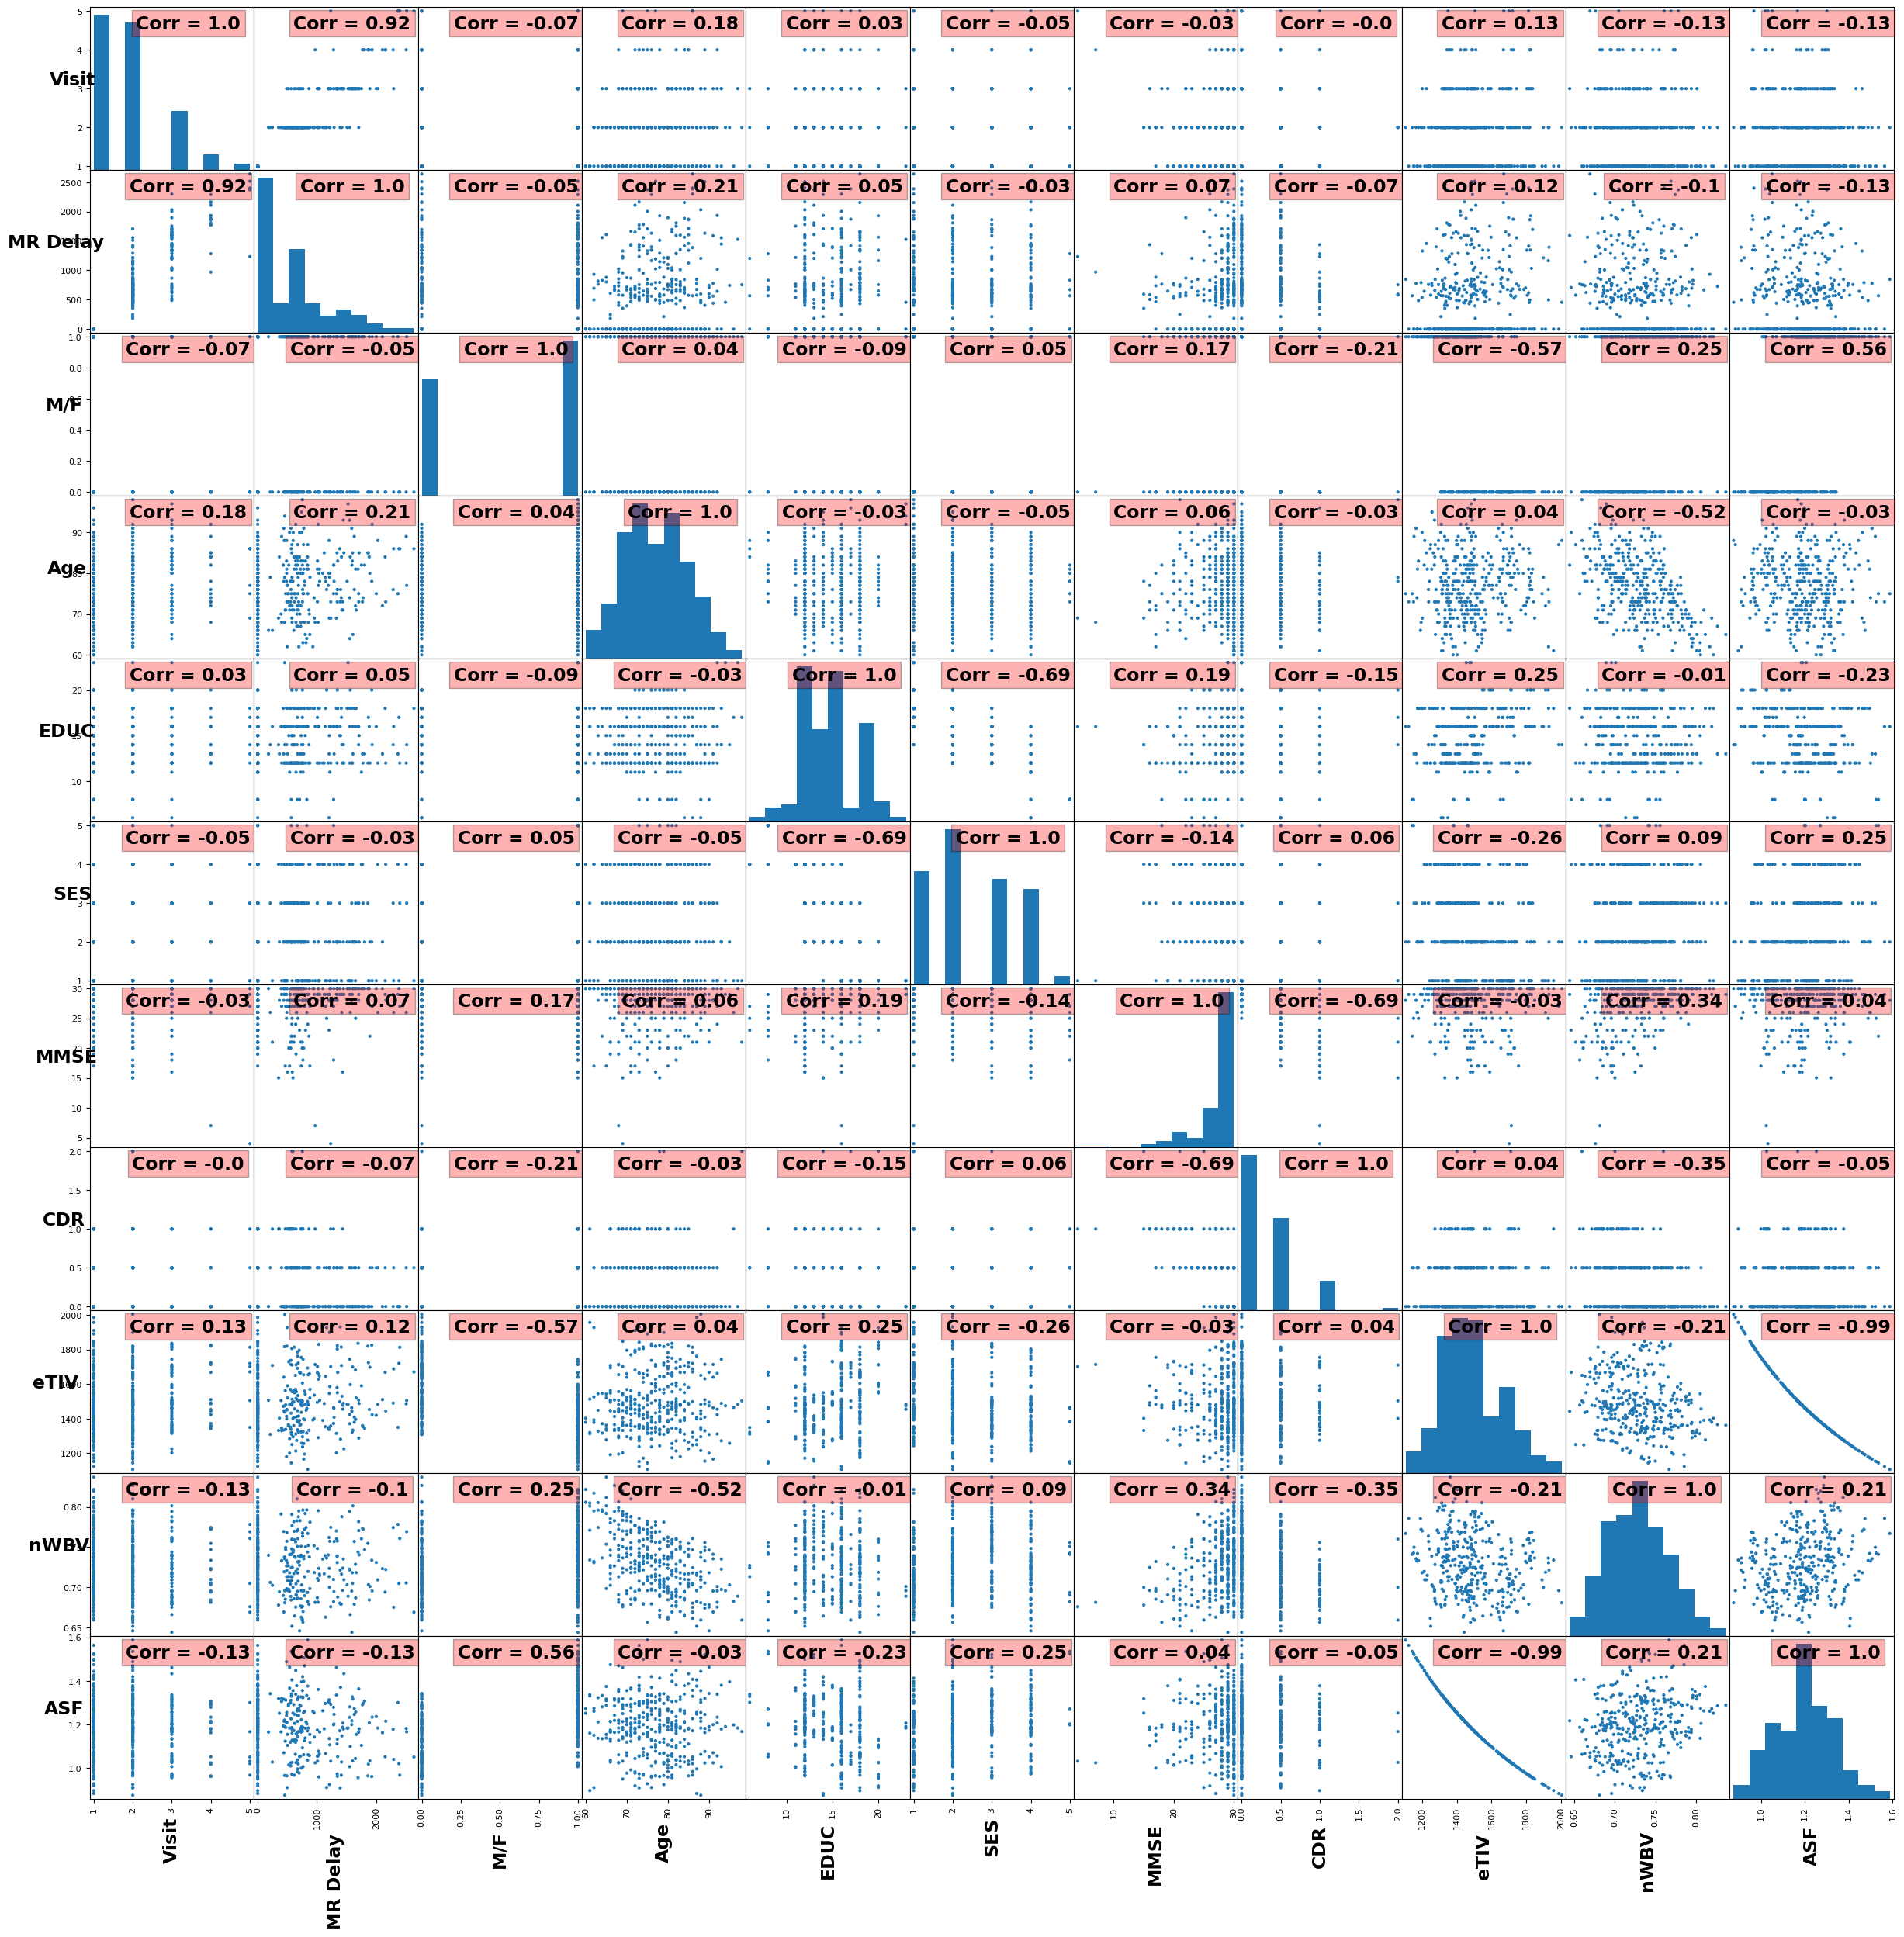

In [6]:
scatter_matrix = pd.plotting.scatter_matrix(
    dataset,
    figsize  = [30, 30],
    alpha = 1
)
i = 1
j = 1
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 17, weight='bold', rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 17, weight='bold', rotation = 0)
    ax.text(0.6, 0.9, f"Corr = {round(corr[cols[i+2]][cols[j+2]],2)}", fontsize = 17, weight='bold', horizontalalignment='center',verticalalignment='center', bbox=dict(facecolor='red', alpha=0.3), transform = ax.transAxes)
    j = j+1
    if(j == 12):
        i = i+1
        j = 1

In [7]:
dataset.drop(['ASF'], axis=1, inplace=True)
dataset.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,0,87,14,2,27,0.0,1986.550000,0.696106
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,0,88,14,2,30,0.0,2004.479526,0.681062
2,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,0,80,12,2,22,0.5,1697.911134,0.701236
3,OAS2_0002,OAS2_0002_MR1,Demented,1,0,0,75,12,2,23,0.5,1678.290000,0.736336
4,OAS2_0002,OAS2_0002_MR2,Demented,2,560,0,76,12,2,28,0.5,1737.620000,0.713402
5,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,1,90,18,3,27,0.0,1200.100000,0.718214
6,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,1,88,18,3,28,0.0,1215.330000,0.709512
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,0,80,12,4,28,0.0,1688.580000,0.711502
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,0,83,12,4,29,0.5,1700.723122,0.711054
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,0,85,12,4,30,0.0,1699.269072,0.705081


In [8]:
dataset['Group'] = dataset['Group'].replace(['Converted'], ['Demented'])
dataset["Group"] = dataset["Group"].replace(['Nondemented','Demented'],[0,1])
dataset.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV
0,OAS2_0001,OAS2_0001_MR1,0,1,0,0,87,14,2,27,0.0,1986.550000,0.696106
1,OAS2_0001,OAS2_0001_MR2,0,2,457,0,88,14,2,30,0.0,2004.479526,0.681062
2,OAS2_0002,OAS2_0002_MR3,1,3,1895,0,80,12,2,22,0.5,1697.911134,0.701236
3,OAS2_0002,OAS2_0002_MR1,1,1,0,0,75,12,2,23,0.5,1678.290000,0.736336
4,OAS2_0002,OAS2_0002_MR2,1,2,560,0,76,12,2,28,0.5,1737.620000,0.713402
5,OAS2_0004,OAS2_0004_MR2,0,2,538,1,90,18,3,27,0.0,1200.100000,0.718214
6,OAS2_0004,OAS2_0004_MR1,0,1,0,1,88,18,3,28,0.0,1215.330000,0.709512
7,OAS2_0005,OAS2_0005_MR1,0,1,0,0,80,12,4,28,0.0,1688.580000,0.711502
8,OAS2_0005,OAS2_0005_MR2,0,2,1010,0,83,12,4,29,0.5,1700.723122,0.711054
9,OAS2_0005,OAS2_0005_MR3,0,3,1603,0,85,12,4,30,0.0,1699.269072,0.705081


In [9]:
dataset['SES'] = dataset['SES'].replace([np.nan], [2])
pd.isnull(dataset).sum() 

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
dtype: int64

Text(0, 0.5, 'Number of patients')

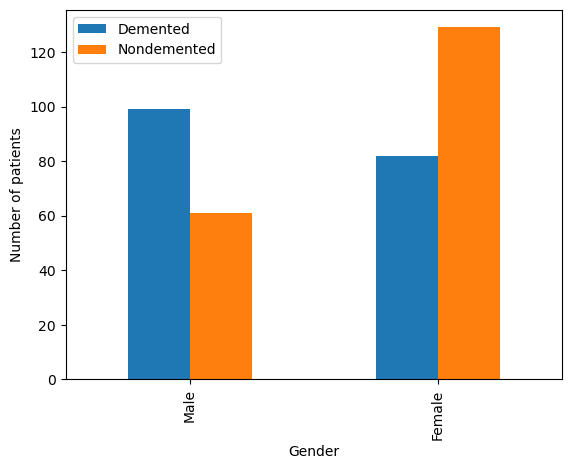

In [10]:
Male = dataset[dataset['M/F']==0]['Group'].value_counts()
Female = dataset[dataset['M/F']==1]['Group'].value_counts()
df_bar = pd.DataFrame([Male, Female])
df_bar.index = ['Male','Female']
df_bar.plot(kind='bar',stacked=False)
plt.legend(['Demented','Nondemented'])
plt.xlabel('Gender')
plt.ylabel('Number of patients')

(0.6, 0.9)

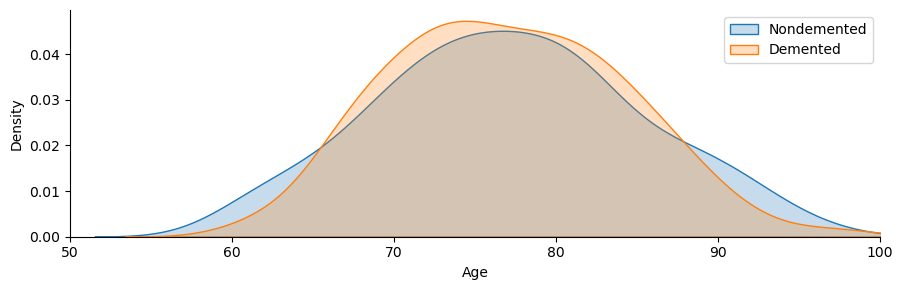

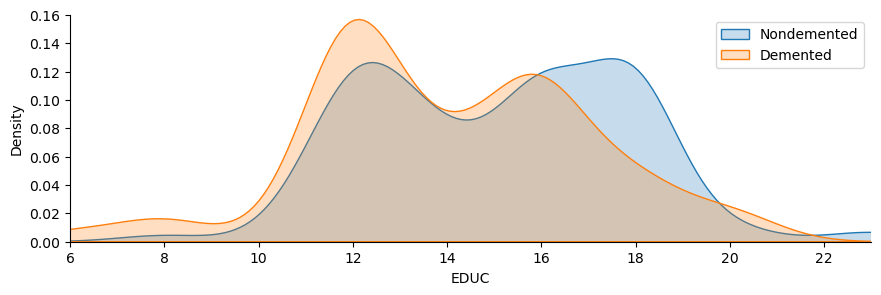

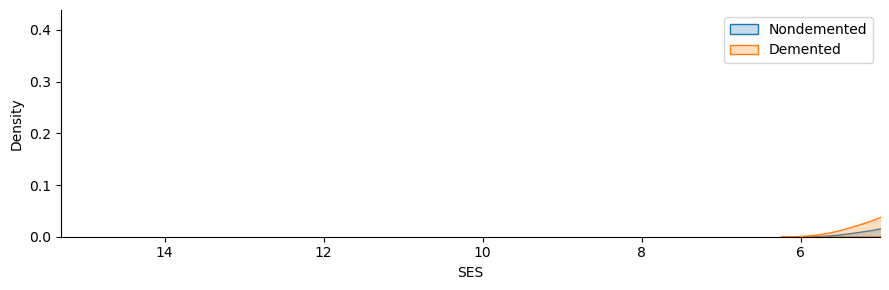

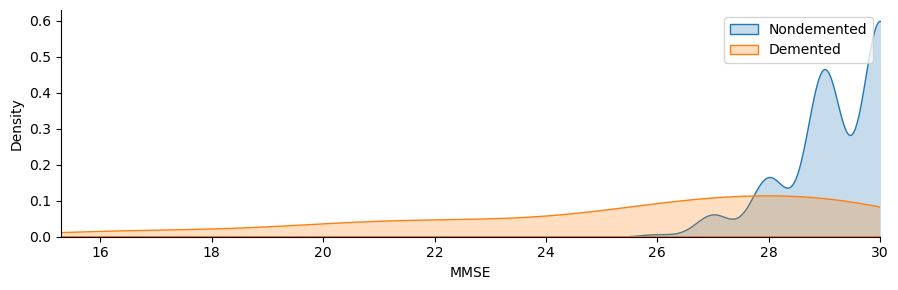

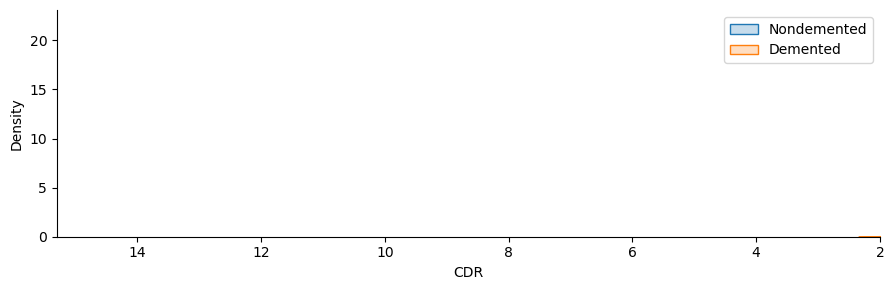

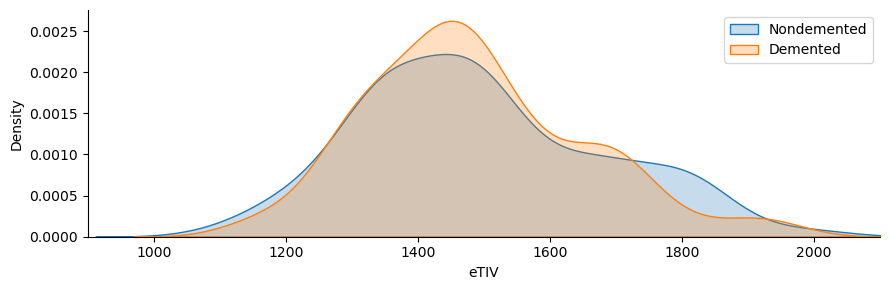

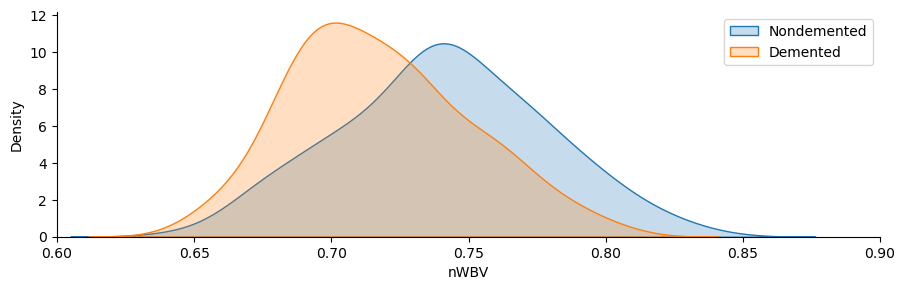

In [11]:
facet= sns.FacetGrid(dataset,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, dataset['Age'].max()))
plt.legend(['Nondemented', 'Demented'])
plt.xlim(50,100)

facet= sns.FacetGrid(dataset,hue="Group", aspect=3)
facet.map(sns.kdeplot,'EDUC',shade= True)
facet.set(xlim=(dataset['EDUC'].min(), dataset['EDUC'].max()))
plt.legend(['Nondemented', 'Demented'])
plt.ylim(0, 0.16)

facet= sns.FacetGrid(dataset,hue="Group", aspect=3)
facet.map(sns.kdeplot,'SES',shade= True)
facet.set(xlim=(0, dataset['SES'].max()))
plt.legend(['Nondemented', 'Demented'])
plt.xlim(15.30)

facet= sns.FacetGrid(dataset,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, dataset['MMSE'].max()))
plt.legend(['Nondemented', 'Demented'])
plt.xlim(15.30)

facet= sns.FacetGrid(dataset,hue="Group", aspect=3)
facet.map(sns.kdeplot,'CDR',shade= True)
facet.set(xlim=(0, dataset['CDR'].max()))
plt.legend(['Nondemented', 'Demented'])
plt.xlim(15.30)

facet= sns.FacetGrid(dataset,hue="Group", aspect=3)
facet.map(sns.kdeplot,'eTIV',shade= True)
facet.set(xlim=(0, dataset['eTIV'].max()))
plt.legend(['Nondemented', 'Demented'])
plt.xlim(900, 2100)

facet= sns.FacetGrid(dataset,hue="Group", aspect=3)
facet.map(sns.kdeplot,'nWBV',shade= True)
facet.set(xlim=(0, dataset['nWBV'].max()))
plt.legend(['Nondemented', 'Demented'])
plt.xlim(0.6,0.9)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score

In [13]:
Y = dataset['Group'].values
X = dataset[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV']]

X_trainval, X_test, Y_trainval, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)

# Feature scaling
scaler = MinMaxScaler().fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)

acc = [] # list to store all performance metrics
estimators = [] # list to store all estimators

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc, f1_score, matthews_corrcoef

In [15]:
from sklearn.tree import DecisionTreeClassifier

best_accuracy = 0

for md in range(1, 8): # iterate different maximum depth values
    # train the model
    model = DecisionTreeClassifier(splitter='random', max_depth=md, criterion='gini', random_state=42)
    # perform cross-validation
    accuracies = cross_val_score(model, X_trainval_scaled, Y_trainval, cv=5, scoring='accuracy')
    
    # compute mean cross-validation accuracy
    accuracy = np.mean(accuracies)
    
    # if we got a better score, store the score and parameters
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_max_depth = md

print("best parameters:",best_max_depth)

# Rebuild a model on the combined training and validation set        
DTmodel = DecisionTreeClassifier(max_depth=best_max_depth).fit(X_trainval_scaled, Y_trainval)

Y_predicted = DTmodel.predict(X_test_scaled)
test_accuracy = accuracy_score(Y_test, Y_predicted)
test_precision = precision_score(Y_test, Y_predicted)
test_recall = recall_score(Y_test, Y_predicted)
fpr, tpr, thresholds = roc_curve(Y_test, Y_predicted)
test_auc = auc(fpr, tpr)
test_f1 = f1_score(Y_test, Y_predicted)
test_mcc = matthews_corrcoef(Y_test, Y_predicted)
print("Test Accuracy with best parameter =", test_accuracy)
print("Test Precision with best parameter =", test_precision)
print("Test Recall with best parameters =", test_recall)
print("Test AUC with the best parameter =", test_auc)
print("Test F1 Score with the best parameter =", test_f1)
print("Test MCC Score with the best parameter =", test_mcc)
 
acc.append(['Decision Tree', test_accuracy, test_precision, test_recall, test_auc, test_f1, test_mcc])
estimators.append(('DT', DecisionTreeClassifier(max_depth=best_max_depth)))

best parameters: 6
Test Accuracy with best parameter = 0.8133333333333334
Test Precision with best parameter = 0.8717948717948718
Test Recall with best parameters = 0.7906976744186046
Test AUC with the best parameter = 0.8172238372093024
Test F1 Score with the best parameter = 0.8292682926829267
Test MCC Score with the best parameter = 0.6280894127237545


In [16]:
from sklearn.ensemble import RandomForestClassifier

best_accuracy = 0

for M in range(10, 101, 10): # combines M trees
    for d in range(1, 8): # maximum number of features considered at each split
        for m in range(1, 8): # maximum depth of the tree
            # train the model
            model = RandomForestClassifier(n_estimators=M, max_features=d, bootstrap=True, oob_score=True, n_jobs=-1, max_depth=m, random_state=42)
        
            # perform cross-validation
            accuracies = cross_val_score(model, X_trainval_scaled, Y_trainval, cv=5, scoring='accuracy')

            # compute mean cross-validation accuracy
            accuracy = np.mean(accuracies)

            # if we got a better score, store the score and parameters
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_M = M
                best_d = d
                best_m = m

print("best parameters:",best_M,best_d,best_m)                

# Rebuild a model on the combined training and validation set        
RFmodel = RandomForestClassifier(n_estimators=best_M, max_features=best_d, max_depth=best_m, n_jobs=-1).fit(X_trainval_scaled, Y_trainval)

Y_predicted = RFmodel.predict(X_test_scaled)
test_accuracy = accuracy_score(Y_test, Y_predicted)
test_precision = precision_score(Y_test, Y_predicted)
test_recall = recall_score(Y_test, Y_predicted)
fpr, tpr, thresholds = roc_curve(Y_test, Y_predicted)
test_auc = auc(fpr, tpr)
test_f1 = f1_score(Y_test, Y_predicted)
test_mcc = matthews_corrcoef(Y_test, Y_predicted)
print("Test Accuracy with best parameter =", test_accuracy)
print("Test Precision with best parameter =", test_precision)
print("Test Recall with best parameters =", test_recall)
print("Test AUC with the best parameter =", test_auc)
print("Test F1 Score with the best parameter =", test_f1)
print("Test MCC Score with the best parameter =", test_mcc)
 
acc.append(['Random Forest', test_accuracy, test_precision, test_recall, test_auc, test_f1, test_mcc])
estimators.append(('RF', RandomForestClassifier(n_estimators=best_M, max_features=best_d, max_depth=best_m, n_jobs=-1)))

best parameters: 20 1 7
Test Accuracy with best parameter = 0.8666666666666667
Test Precision with best parameter = 0.8837209302325582
Test Recall with best parameters = 0.8837209302325582
Test AUC with the best parameter = 0.8637354651162791
Test F1 Score with the best parameter = 0.8837209302325582
Test MCC Score with the best parameter = 0.7274709302325582


In [17]:
from sklearn.ensemble import AdaBoostClassifier

best_accuracy = 0

for M in range(10, 101, 10): # combines M trees
    for lr in [0.0001, 0.001, 0.01, 0.1, 1, 10]:
        # train the model
        model = AdaBoostClassifier(estimator=DTmodel, n_estimators=M, learning_rate=lr, random_state=42)

        # perform cross-validation
        accuracies = cross_val_score(model, X_trainval_scaled, Y_trainval, cv=5, scoring='accuracy')

        # compute mean cross-validation accuracy
        accuracy = np.mean(accuracies)

        # if we got a better score, store the score and parameters
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_M = M
            best_lr = lr

print("best parameters:",best_M,best_lr)

# Rebuild a model on the combined training and validation set        
ABmodel = AdaBoostClassifier(estimator=DTmodel, n_estimators=best_M, learning_rate=best_lr).fit(X_trainval_scaled, Y_trainval)

Y_predicted = ABmodel.predict(X_test_scaled)
test_accuracy = accuracy_score(Y_test, Y_predicted)
test_precision = precision_score(Y_test, Y_predicted)
test_recall = recall_score(Y_test, Y_predicted)
fpr, tpr, thresholds = roc_curve(Y_test, Y_predicted)
test_auc = auc(fpr, tpr)
test_f1 = f1_score(Y_test, Y_predicted)
test_mcc = matthews_corrcoef(Y_test, Y_predicted)
print("Test Accuracy with best parameter =", test_accuracy)
print("Test Precision with best parameter =", test_precision)
print("Test Recall with best parameters =", test_recall)
print("Test AUC with the best parameter =", test_auc)
print("Test F1 Score with the best parameter =", test_f1)
print("Test MCC Score with the best parameter =", test_mcc)
 
acc.append(['AdaBoost', test_accuracy, test_precision, test_recall, test_auc, test_f1, test_mcc])
estimators.append(('AB', AdaBoostClassifier(estimator=DTmodel, n_estimators=best_M, learning_rate=best_lr)))

best parameters: 30 1
Test Accuracy with best parameter = 0.88
Test Precision with best parameter = 0.925
Test Recall with best parameters = 0.8604651162790697
Test AUC with the best parameter = 0.8833575581395349
Test F1 Score with the best parameter = 0.891566265060241
Test MCC Score with the best parameter = 0.7601148633474598


In [18]:
from sklearn.ensemble import GradientBoostingClassifier

best_accuracy = 0

for M in range(10, 101, 10): # combines M trees
    for lr in [0.0001, 0.001, 0.01, 0.1, 1, 10]:
        for md in range(1,8):
            # train the model
            model = GradientBoostingClassifier(n_estimators=M, learning_rate=lr, max_depth=md, random_state=42)

            # perform cross-validation
            accuracies = cross_val_score(model, X_trainval_scaled, Y_trainval, cv=5, scoring='accuracy')

            # compute mean cross-validation accuracy
            accuracy = np.mean(accuracies)

            # if we got a better score, store the score and parameters
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_M = M
                best_lr = lr
                best_md = md

print("best parameters:",best_M,best_lr,best_md)

# Rebuild a model on the combined training and validation set        
GBmodel = GradientBoostingClassifier(loss='log_loss', n_estimators=best_M, learning_rate=best_lr, max_depth=best_md).fit(X_trainval_scaled, Y_trainval)

Y_predicted = GBmodel.predict(X_test_scaled)
test_accuracy = accuracy_score(Y_test, Y_predicted)
test_precision = precision_score(Y_test, Y_predicted)
test_recall = recall_score(Y_test, Y_predicted)
fpr, tpr, thresholds = roc_curve(Y_test, Y_predicted)
test_auc = auc(fpr, tpr)
test_f1 = f1_score(Y_test, Y_predicted)
test_mcc = matthews_corrcoef(Y_test, Y_predicted)
print("Test Accuracy with best parameter =", test_accuracy)
print("Test Precision with best parameter =", test_precision)
print("Test Recall with best parameters =", test_recall)
print("Test AUC with the best parameter =", test_auc)
print("Test F1 Score with the best parameter =", test_f1)
print("Test MCC Score with the best parameter =", test_mcc)
 
acc.append(['Gradient Boost', test_accuracy, test_precision, test_recall, test_auc, test_f1, test_mcc])
estimators.append(('GB', GradientBoostingClassifier(loss='log_loss', n_estimators=best_M, learning_rate=best_lr, max_depth=best_md)))

best parameters: 60 1 5
Test Accuracy with best parameter = 0.84
Test Precision with best parameter = 0.8780487804878049
Test Recall with best parameters = 0.8372093023255814
Test AUC with the best parameter = 0.8404796511627908
Test F1 Score with the best parameter = 0.8571428571428572
Test MCC Score with the best parameter = 0.6765485803316938


In [19]:
import xgboost as xgb

best_accuracy = 0

for M in range(10, 101, 10): # combines M trees
    for lr in [0.0001, 0.001, 0.01, 0.1, 1, 10]:
        for md in range(1,8):
            # train the model
            model = xgb.XGBClassifier(objective='binary:logistic', loss='log_loss', n_estimators=M, learning_rate=lr, max_depth=md, random_state=42)

            # perform cross-validation
            accuracies = cross_val_score(model, X_trainval_scaled, Y_trainval, cv=5, scoring='accuracy')

            # compute mean cross-validation accuracy
            accuracy = np.mean(accuracies)

            # if we got a better score, store the score and parameters
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_M = M
                best_lr = lr
                best_md = md

print("best parameters:",best_M,best_lr, best_md)

# Rebuild a model on the combined training and validation set        
XGBmodel = xgb.XGBClassifier(objective='binary:logistic', loss='log_loss', n_estimators=best_M, learning_rate=best_lr, max_depth=best_md).fit(X_trainval_scaled, Y_trainval)

Y_predicted = XGBmodel.predict(X_test_scaled)
test_accuracy = accuracy_score(Y_test, Y_predicted)
test_precision = precision_score(Y_test, Y_predicted)
test_recall = recall_score(Y_test, Y_predicted)
fpr, tpr, thresholds = roc_curve(Y_test, Y_predicted)
test_auc = auc(fpr, tpr)
test_f1 = f1_score(Y_test, Y_predicted)
test_mcc = matthews_corrcoef(Y_test, Y_predicted)
print("Test Accuracy with best parameter =", test_accuracy)
print("Test Precision with best parameter =", test_precision)
print("Test Recall with best parameters =", test_recall)
print("Test AUC with the best parameter =", test_auc)
print("Test F1 Score with the best parameter =", test_f1)
print("Test MCC Score with the best parameter =", test_mcc)
 
acc.append(['XG Boost', test_accuracy, test_precision, test_recall, test_auc, test_f1, test_mcc])
estimators.append(('XGB', xgb.XGBClassifier(objective='binary:logistic', loss='log_loss', n_estimators=best_M, learning_rate=best_lr, max_depth=best_md)))

best parameters: 90 0.1 7
Test Accuracy with best parameter = 0.8533333333333334
Test Precision with best parameter = 0.8809523809523809
Test Recall with best parameters = 0.8604651162790697
Test AUC with the best parameter = 0.8521075581395349
Test F1 Score with the best parameter = 0.8705882352941177
Test MCC Score with the best parameter = 0.7016700587441111


In [20]:
from sklearn.svm import SVC

best_accuracy = 0

for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter C
    for k in ['linear', 'poly', 'rbf', 'sigmoid']:
        # train the model
        model = SVC(kernel=k, C=c, random_state=42)

        # perform cross-validation
        accuracies = cross_val_score(model, X_trainval_scaled, Y_trainval, cv=5, scoring='accuracy')

        # compute mean cross-validation accuracy
        accuracy = np.mean(accuracies)

        # if we got a better score, store the score and parameters
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k
            best_c = c

print("best parameters:",best_k,best_c)

# Rebuild a model on the combined training and validation set        
SVMmodel = SVC(kernel=best_k, C=best_c).fit(X_trainval_scaled, Y_trainval)

Y_predicted = SVMmodel.predict(X_test_scaled)
test_accuracy = accuracy_score(Y_test, Y_predicted)
test_precision = precision_score(Y_test, Y_predicted)
test_recall = recall_score(Y_test, Y_predicted)
fpr, tpr, thresholds = roc_curve(Y_test, Y_predicted)
test_auc = auc(fpr, tpr)
test_f1 = f1_score(Y_test, Y_predicted)
test_mcc = matthews_corrcoef(Y_test, Y_predicted)
print("Test Accuracy with best parameter =", test_accuracy)
print("Test Precision with best parameter =", test_precision)
print("Test Recall with best parameters =", test_recall)
print("Test AUC with the best parameter =", test_auc)
print("Test F1 Score with the best parameter =", test_f1)
print("Test MCC Score with the best parameter =", test_mcc)
 
acc.append(['SVM', test_accuracy, test_precision, test_recall, test_auc, test_f1, test_mcc])
estimators.append(('SVM', SVC(kernel=best_k, C=best_c, probability=True)))

best parameters: rbf 1000
Test Accuracy with best parameter = 0.9066666666666666
Test Precision with best parameter = 0.95
Test Recall with best parameters = 0.8837209302325582
Test AUC with the best parameter = 0.9106104651162791
Test F1 Score with the best parameter = 0.9156626506024096
Test MCC Score with the best parameter = 0.8141514650072319


In [21]:
from sklearn.linear_model import LogisticRegression

best_accuracy = 0

for c in [0.001, 0.1, 1, 10, 100, 1000]:
    # train the model
    model = LogisticRegression(C=c, random_state=42)

    # perform cross-validation
    accuracies = cross_val_score(model, X_trainval_scaled, Y_trainval, cv=5, scoring='accuracy')

    # compute mean cross-validation accuracy
    accuracy = np.mean(accuracies)

    # if we got a better score, store the score and parameters
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_c = c

print("best parameters:",best_c)

# Rebuild a model on the combined training and validation set        
LRmodel = LogisticRegression(C=best_c).fit(X_trainval_scaled, Y_trainval)

Y_predicted = LRmodel.predict(X_test_scaled)
test_accuracy = accuracy_score(Y_test, Y_predicted)
test_precision = precision_score(Y_test, Y_predicted)
test_recall = recall_score(Y_test, Y_predicted)
fpr, tpr, thresholds = roc_curve(Y_test, Y_predicted)
test_auc = auc(fpr, tpr)
test_f1 = f1_score(Y_test, Y_predicted)
test_mcc = matthews_corrcoef(Y_test, Y_predicted)
print("Test Accuracy with best parameter =", test_accuracy)
print("Test Precision with best parameter =", test_precision)
print("Test Recall with best parameters =", test_recall)
print("Test AUC with the best parameter =", test_auc)
print("Test F1 Score with the best parameter =", test_f1)
print("Test MCC Score with the best parameter =", test_mcc)
 
acc.append(['Logistic Regression', test_accuracy, test_precision, test_recall, test_auc, test_f1, test_mcc])
estimators.append(('LR', LogisticRegression(C=best_c)))

best parameters: 100
Test Accuracy with best parameter = 0.8266666666666667
Test Precision with best parameter = 0.8947368421052632
Test Recall with best parameters = 0.7906976744186046
Test AUC with the best parameter = 0.8328488372093024
Test F1 Score with the best parameter = 0.8395061728395061
Test MCC Score with the best parameter = 0.6585573427280679


In [90]:
from sklearn.neighbors import KNeighborsClassifier

best_accuracy = 0

for k in range(1, 102, 2):
    # train the model
    model = KNeighborsClassifier(n_neighbors=k)

    # perform cross-validation
    accuracies = cross_val_score(model, X_trainval_scaled, Y_trainval, cv=5, scoring='accuracy')

    # compute mean cross-validation accuracy
    accuracy = np.mean(accuracies)

    # if we got a better score, store the score and parameters
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print("best parameters:",best_k
      )
# Rebuild a model on the combined training and validation set        
kNNmodel = KNeighborsClassifier(n_neighbors=best_k).fit(X_trainval_scaled, Y_trainval)

Y_predicted = kNNmodel.predict(X_test_scaled)
test_accuracy = accuracy_score(Y_test, Y_predicted)
test_precision = precision_score(Y_test, Y_predicted)
test_recall = recall_score(Y_test, Y_predicted)
fpr, tpr, thresholds = roc_curve(Y_test, Y_predicted)
test_auc = auc(fpr, tpr)
test_f1 = f1_score(Y_test, Y_predicted)
test_mcc = matthews_corrcoef(Y_test, Y_predicted)
print("Test Accuracy with best parameter =", test_accuracy)
print("Test Precision with best parameter =", test_precision)
print("Test Recall with best parameters =", test_recall)
print("Test AUC with the best parameter =", test_auc)
print("Test F1 Score with the best parameter =", test_f1)
print("Test MCC Score with the best parameter =", test_mcc)
 
acc.append(['kNN', test_accuracy, test_precision, test_recall, test_auc, test_f1, test_mcc])
estimators.append(('kNN', KNeighborsClassifier(n_neighbors=best_k)))

best parameters: 1
Test Accuracy with best parameter = 0.8933333333333333
Test Precision with best parameter = 0.972972972972973
Test Recall with best parameters = 0.8372093023255814
Test AUC with the best parameter = 0.9029796511627908
Test F1 Score with the best parameter = 0.9
Test MCC Score with the best parameter = 0.7973145121019949


In [91]:
from sklearn.neural_network import MLPClassifier

best_accuracy = 0

for n in [10,50,100,250]:
    for i in range(1,4):
        size = (n,)*i
        for act in ['identity', 'logistic', 'tanh', 'relu']:
            # train the model
            model = MLPClassifier(activation=act, hidden_layer_sizes=size, learning_rate='adaptive', shuffle=True, random_state=42)

            # perform cross-validation
            accuracies = cross_val_score(model, X_trainval_scaled, Y_trainval, cv=5, scoring='accuracy')

            # compute mean cross-validation accuracy
            accuracy = np.mean(accuracies)

            # if we got a better score, store the score and parameters
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_act = act
                best_size = size

print("best parameters:",best_act,best_size)

# Rebuild a model on the combined training and validation set        
NNmodel = MLPClassifier(activation=best_act, hidden_layer_sizes=best_size, learning_rate='adaptive').fit(X_trainval_scaled, Y_trainval)

Y_predicted = NNmodel.predict(X_test_scaled)
test_accuracy = accuracy_score(Y_test, Y_predicted)
test_precision = precision_score(Y_test, Y_predicted)
test_recall = recall_score(Y_test, Y_predicted)
fpr, tpr, thresholds = roc_curve(Y_test, Y_predicted)
test_auc = auc(fpr, tpr)
test_f1 = f1_score(Y_test, Y_predicted)
test_mcc = matthews_corrcoef(Y_test, Y_predicted)
print("Test Accuracy with best parameter =", test_accuracy)
print("Test Precision with best parameter =", test_precision)
print("Test Recall with best parameters =", test_recall)
print("Test AUC with the best parameter =", test_auc)
print("Test F1 Score with the best parameter =", test_f1)
print("Test MCC Score with the best parameter =", test_mcc)
 
acc.append(['Neural Network', test_accuracy, test_precision, test_recall, test_auc, test_f1, test_mcc])
estimators.append(('NN', MLPClassifier(activation=best_act, hidden_layer_sizes=best_size, learning_rate='adaptive')))

best parameters: relu (250, 250)
Test Accuracy with best parameter = 0.88
Test Precision with best parameter = 0.9473684210526315
Test Recall with best parameters = 0.8372093023255814
Test AUC with the best parameter = 0.8873546511627908
Test F1 Score with the best parameter = 0.8888888888888888
Test MCC Score with the best parameter = 0.7663997023451096


In [114]:
from sklearn.ensemble import VotingClassifier
        
softVotemodel = VotingClassifier(estimators=estimators, voting='soft').fit(X_trainval_scaled, Y_trainval)

Y_predicted = softVotemodel.predict(X_test_scaled)
test_accuracy = accuracy_score(Y_test, Y_predicted)
test_precision = precision_score(Y_test, Y_predicted)
test_recall = recall_score(Y_test, Y_predicted)
fpr, tpr, thresholds = roc_curve(Y_test, Y_predicted)
test_auc = auc(fpr, tpr)
test_f1 = f1_score(Y_test, Y_predicted)
test_mcc = matthews_corrcoef(Y_test, Y_predicted)
print("Test Accuracy with best parameter =", test_accuracy)
print("Test Precision with best parameter =", test_precision)
print("Test Recall with best parameters =", test_recall)
print("Test AUC with the best parameter =", test_auc)
print("Test F1 Score with the best parameter =", test_f1)
print("Test MCC Score with the best parameter =", test_mcc)

acc.append(['Soft Voting', test_accuracy, test_precision, test_recall, test_auc, test_f1, test_mcc])

Test Accuracy with best parameter = 0.9466666666666667
Test Precision with best parameter = 1.0
Test Recall with best parameters = 0.9069767441860465
Test AUC with the best parameter = 0.9534883720930232
Test F1 Score with the best parameter = 0.951219512195122
Test MCC Score with the best parameter = 0.8978872704229619


In [ ]:
df = pd.DataFrame(X_test)
df['Test Values'] = Y_test
df['Predicted Values'] = Y_predicted
df.to_excel("Output.xlsx", index=False)

In [115]:
hardVotemodel = VotingClassifier(estimators=estimators, voting='hard').fit(X_trainval_scaled, Y_trainval)

Y_predicted = hardVotemodel.predict(X_test_scaled)
test_accuracy = accuracy_score(Y_test, Y_predicted)
test_precision = precision_score(Y_test, Y_predicted)
test_recall = recall_score(Y_test, Y_predicted)
fpr, tpr, thresholds = roc_curve(Y_test, Y_predicted)
test_auc = auc(fpr, tpr)
test_f1 = f1_score(Y_test, Y_predicted)
test_mcc = matthews_corrcoef(Y_test, Y_predicted)
print("Test Accuracy with best parameter =", test_accuracy)
print("Test Precision with best parameter =", test_precision)
print("Test Recall with best parameters =", test_recall)
print("Test AUC with the best parameter =", test_auc)
print("Test F1 Score with the best parameter =", test_f1)
print("Test MCC Score with the best parameter =", test_mcc)
 
acc.append(['Hard Voting', test_accuracy, test_precision, test_recall, test_auc, test_f1, test_mcc])

Test Accuracy with best parameter = 0.92
Test Precision with best parameter = 0.9743589743589743
Test Recall with best parameters = 0.8837209302325582
Test AUC with the best parameter = 0.9262354651162791
Test F1 Score with the best parameter = 0.9268292682926831
Test MCC Score with the best parameter = 0.8439276988831204


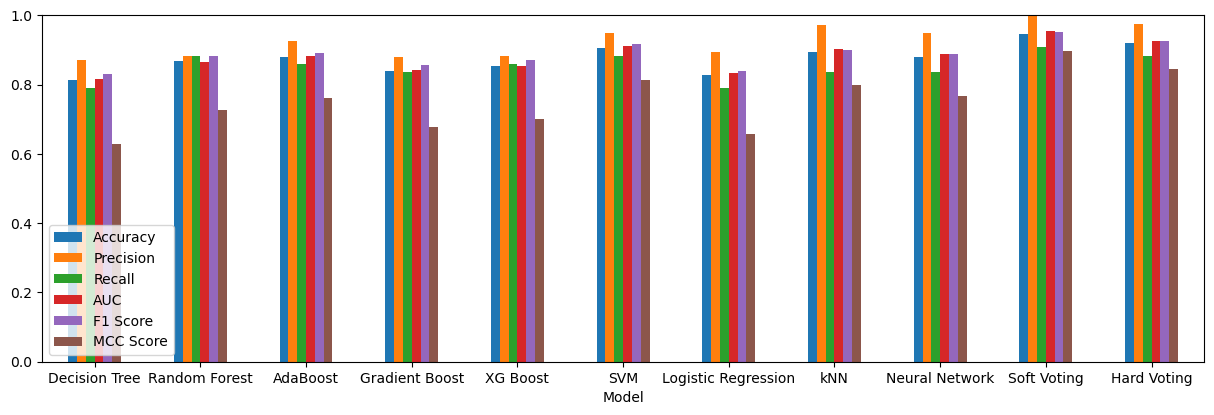

In [116]:
accuracy_dataset = pd.DataFrame(acc, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'AUC', 'F1 Score', 'MCC Score'])
accuracy_dataset.plot(x='Model', y=['Accuracy', 'Precision', 'Recall', 'AUC', 'F1 Score', 'MCC Score'], kind="bar", figsize=(15,4.5), rot=0)
plt.legend(loc='lower left')
plt.ylim(0,1)
plt.show()

In [118]:
df = pd.DataFrame(acc, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'AUC', 'F1 Score', 'MCC'])
df.to_excel("Performance.xlsx", index=False)